In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [120]:

# Step 1: Read the Data
artist_data = pd.read_csv('./Data/artists-data.csv')
lyrics_data = pd.read_csv('./Data/lyrics-data.csv')


In [121]:
langauge_codes = pd.read_csv('./Data/language-codes.tsv', sep='\t')

langauge_codes = langauge_codes[['ISO_name', 'language-639-1']]
langauge_codes.head()



,ISO_name,language-639-1
0,Abkhazian,ab
1,Afar,aa
2,Afrikaans,af
3,Akan,ak
4,Albanian,sq


In [122]:

# Step 2: Basic Information
print("Artist Data Info:")
print(artist_data.info())
print("\nLyrics Data Info:")
print(lyrics_data.info())

Artist Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4168 entries, 0 to 4167
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      4167 non-null   object 
 1   Genres      4163 non-null   object 
 2   Songs       4167 non-null   float64
 3   Popularity  4166 non-null   float64
 4   ALink       4167 non-null   object 
dtypes: float64(2), object(3)
memory usage: 162.9+ KB
None

Lyrics Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379931 entries, 0 to 379930
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ALink           379930 non-null  object
 1   SName           379928 non-null  object
 2   SLink           379930 non-null  object
 3   Lyric           379854 non-null  object
 4   language-639-1  365296 non-null  object
dtypes: object(5)
memory usage: 14.5+ MB
None


In [123]:
# Step 3: Data Cleaning
# This step depends on the specifics of your data. For example:
artist_data['Genres'] = artist_data['Genres'].str.split('; ')
lyrics_data.dropna(subset=['Lyric'], inplace=True)

# Step 4: Analysis
## Artist Data Analysis
print("\nArtist Data Analysis:")
print(artist_data.describe())
# Genres Distribution
print("\nGenre Distribution:")
print(artist_data['Genres'].value_counts())




Artist Data Analysis:
             Songs   Popularity
count  4167.000000  4166.000000
mean     91.021358     1.831325
std      96.655819     8.036739
min       0.000000     0.000000
25%      26.000000     0.000000
50%      64.000000     0.000000
75%     123.000000     1.000000
max    1029.000000   205.500000

Genre Distribution:
Genres
[Gospel/Religioso]                             244
[Sertanejo]                                     97
[Funk Carioca]                                  61
[Indie]                                         53
[Pop]                                           49
                                              ... 
[Gospel/Religioso, Jovem Guarda]                 1
[Gospel/Religioso, Instrumental, Pop]            1
[Gospel/Religioso, Soul Music, Black Music]      1
[Heavy Metal, Hardcore, Gospel/Religioso]        1
[World Music, Black Music, Blues]                1
Name: count, Length: 1750, dtype: int64


In [124]:
## Lyrics Data Analysis
print("\nLyrics Data Analysis:")
print(lyrics_data.describe())
# Language Distribution
print("\nLanguage Distribution:")
# print()
lyrics_data['language-639-1'].value_counts().head(10)




Lyrics Data Analysis:
                   ALink   SName  \
count             379854  379852   
unique              4238  267214   
top     /anjos-anonimos/   Intro   
freq                1029     116   

                                                 SLink         Lyric  \
count                                           379854        379854   
unique                                          379831        371181   
top     /bee-gees/our-love-dont-throw-it-all-away.html  Instrumental   
freq                                                 2          2087   

       language-639-1  
count          365296  
unique             52  
top                en  
freq           191814  

Language Distribution:


language-639-1
en    191814
pt    157393
es      9917
rw      1679
it      1432
fr      1225
de       844
fi       145
sv       112
ro        97
Name: count, dtype: int64

In [125]:
artist_data_sel = artist_data[['ALink', 'Artist', 'Genres']]

In [126]:
pt_to_en = pd.read_csv('./Data/pt_to_en_genres.csv')
pt_to_en_dict = dict(zip(pt_to_en['pt'], pt_to_en['en']))
pt_to_en.head()


,pt,en
0,Trap,Trap
1,Clássico,Classical
2,Fado,Fado
3,Rap,Rap
4,Trip-Hop,Trip-Hop


In [127]:
genre_list = artist_data['Genres'].fillna('').tolist()
# print(genre_list[0])

genre_list_new = set()
for sublist in genre_list:
    print(sublist)
    if sublist is not None and len(sublist) > 0:
        genre_list_new.update(sublist)

genre_list = [item for sublist in genre_list for item in sublist if sublist is not None ] #.split(';')]
genre_list = list(set(genre_list))
print(len(genre_list))
print(genre_list)

['Pop', 'Axé', 'Romântico']
['Axé']
['Axé', 'Romântico', 'Reggae']
['Axé']
['Pop', 'Axé', 'Romântico']
['Axé', 'Samba', 'Pagode']
['Axé', 'Pop']
['MPB', 'Axé']
['Axé']
['Axé']
['Axé', 'Forró', 'Romântico']
['Axé', 'Romântico', 'Chillout']
['Axé']
['Axé']
['Romântico', 'Axé', 'Reggae']
['Axé', 'Romântico', 'Trilha Sonora']
['Axé']
['Axé', 'Samba', 'MPB']
['Axé']
['Axé', 'Pop', 'Romântico']
['Axé', 'Pagode', 'Samba']
['Axé', 'Pagode', 'Funk']
['Axé']
['Axé']
['Axé']
['Pagode', 'Axé', 'Funk']
['Axé', 'Romântico', 'Pagode']
['Axé', 'Dance', 'Pop/Rock']
['Axé', 'Funk', 'Electronica']
['Axé', 'Pagode', 'Samba']
['Axé', 'Romântico', 'Dance']
['Axé']
['Axé', 'Romântico', 'Pagode']
['Axé', 'Pagode', 'Funk']
['Pop', 'Axé', 'Sertanejo']
['Pagode', 'Axé', 'Samba']
['Funk Carioca', 'Axé', 'Funk']
['Axé', 'Funk', 'Forró']
['Axé', 'Pagode']
['Sertanejo', 'MPB', 'Axé']
['Axé']
['World Music', 'Axé', 'MPB']
['Axé']
['MPB', 'Pop', 'Axé']
['Pop', 'R&B', 'Black Music']
['R&B', 'Pop', 'Black Music']
['Pop'

In [128]:

langauges_to_keep = ['en'] #, 'pt', 'es', 'it']
lyrics_data_sel = lyrics_data[lyrics_data['language-639-1'].isin(langauges_to_keep)]

# lyrics_data_sel = pd.merge(lyrics_data_sel, langauge_codes, how='left', left_on='language-639-1', right_on='language-639-1')
lyrics_data_sel = lyrics_data_sel.drop(columns=['language-639-1'])

lyrics_data_sel = pd.merge(lyrics_data_sel, artist_data_sel, how='left', left_on='ALink', right_on='ALink')

def update_genre(genres):
    new_genres = [pt_to_en_dict[genre] for genre in genres if genre in pt_to_en_dict.keys()]
    return new_genres

lyrics_data_sel['Genres'] = lyrics_data_sel['Genres'].fillna("").apply(update_genre)

lyrics_data_sel.head()



,ALink,SName,SLink,Lyric,Artist,Genres
0,/ivete-sangalo/,Careless Whisper,/ivete-sangalo/careless-whisper.html,I feel so unsure\nAs I take your hand and lead...,Ivete Sangalo,"[Pop, Axé, Romantic]"
1,/ivete-sangalo/,Could You Be Loved / Citação Musical do Rap: S...,/ivete-sangalo/could-you-be-loved-citacao-musi...,"Don't let them fool, ya\nOr even try to school...",Ivete Sangalo,"[Pop, Axé, Romantic]"
2,/ivete-sangalo/,Cruisin' (Part. Saulo),/ivete-sangalo/cruisin-part-saulo.html,"Baby, let's cruise, away from here\nDon't be c...",Ivete Sangalo,"[Pop, Axé, Romantic]"
3,/ivete-sangalo/,Easy,/ivete-sangalo/easy.html,"Know it sounds funny\nBut, I just can't stand ...",Ivete Sangalo,"[Pop, Axé, Romantic]"
4,/ivete-sangalo/,For Your Babies (The Voice cover),/ivete-sangalo/for-your-babies-the-voice-cover...,You've got that look again\nThe one I hoped I ...,Ivete Sangalo,"[Pop, Axé, Romantic]"


In [129]:
def text_formatter(row):
    # Data_Format = f"### Instructions:  \n\n### Input:\n{row['']} \n\n### Response:\n{}"
    # Data_Format = f"### Instructions: You are a creative, world-famous expert lyricist. Write lyrics for a song, given just a title and artist name and any additional information provided.\n\n### Input:\nGiven the artist {row['Artist']}, write Lyrics for a song titled {row['SName']} \n\n### Response:\n{row['Lyric']}"
    # Data_Format = f"### Instructions: You are a creative, world-famous expert lyricist. Write lyrics for a song, given just a title and artist name and any additional information provided.\n\n### Input:\nWrite lyrics for a song titled {row['SName']} to be performed by {row['Artist']}\n\n### Response:\n{row['Lyric']}"
    genre_info = ""
    if row['Genres'] != "" and row['Genres'] is not None:
        genre_info = ', '.join(row['Genres'])
        genre_info = f" using the following genres: {genre_info}"
    
    
    data_formated = f"### Instructions: You are a creative, world-famous expert lyricist. Write lyrics for a song, given just a title, artist name, possible genres, and any additional information provided.\n\n### Input:\nWrite lyrics for a song titled \"{row['SName']}\" to be performed by {row['Artist']}{genre_info}.\n\n### Response:\n{row['Lyric']}"
    
    return data_formated
    


In [130]:
lyrics_data_sel.to_csv('./Data/lyrics-data-combined.tsv', sep='\t', index=False)

In [131]:
lyrics_data_sel['Text'] = lyrics_data_sel.apply(text_formatter, axis=1)

In [132]:
lyrics_taylor_swift = lyrics_data_sel[lyrics_data_sel['Artist'] == 'Taylor Swift']

lyrics_taylor_swift.head()

,ALink,SName,SLink,Lyric,Artist,Genres,Text
20126,/taylor-swift/,Lover,/taylor-swift/lover.html,We could leave the Christmas lights up 'til Ja...,Taylor Swift,"[Pop, Romantic, Pop/Rock]","### Instructions: You are a creative, world-fa..."
20127,/taylor-swift/,Blank Space,/taylor-swift/blank-space.html,"Nice to meet you, where you been?\nI could sho...",Taylor Swift,"[Pop, Romantic, Pop/Rock]","### Instructions: You are a creative, world-fa..."
20128,/taylor-swift/,cardigan,/taylor-swift/cardigan.html,"Vintage tee, brand new phone\nHigh heels on co...",Taylor Swift,"[Pop, Romantic, Pop/Rock]","### Instructions: You are a creative, world-fa..."
20129,/taylor-swift/,Shake It Off,/taylor-swift/shake-it-off.html,I stay out too late\nGot nothing in my brain\n...,Taylor Swift,"[Pop, Romantic, Pop/Rock]","### Instructions: You are a creative, world-fa..."
20130,/taylor-swift/,All Too Well,/taylor-swift/all-too-well.html,I walked through the door with you\nThe air wa...,Taylor Swift,"[Pop, Romantic, Pop/Rock]","### Instructions: You are a creative, world-fa..."


In [133]:
lyrics_data_sel.to_csv('./Data/lyrics-data-formatted.tsv', sep='\t', index=False)

In [134]:
print(lyrics_taylor_swift.iloc[0]['Text'])

### Instructions: You are a creative, world-famous expert lyricist. Write lyrics for a song, given just a title, artist name, possible genres, and any additional information provided.

### Input:
Write lyrics for a song titled "Lover" to be performed by Taylor Swift using the following genres: Pop, Romantic, Pop/Rock.

### Response:
We could leave the Christmas lights up 'til January
This is our place, we make the rules
And there's a dazzling haze
A mysterious way about you dear
Have I known you 20 seconds or 20 years?

Can I go where you go?
Can we always be this close forever and ever?
And ah, take me out, and take me home
You're my, my, my, my lover

We could let our friends crash in the living room
This is our place, we make the call
And I'm highly suspicious
that everyone who sees you wants you
I've loved you three summers now, honey
But I want 'em all

Can I go where you go?
Can we always be this close forever and ever?
And ah, take me out, and take me home
(Forever and ever)
You

In [135]:
# lyrics_data_sel[]

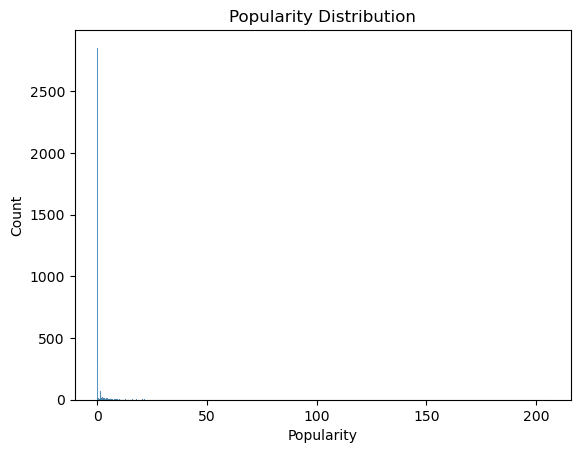

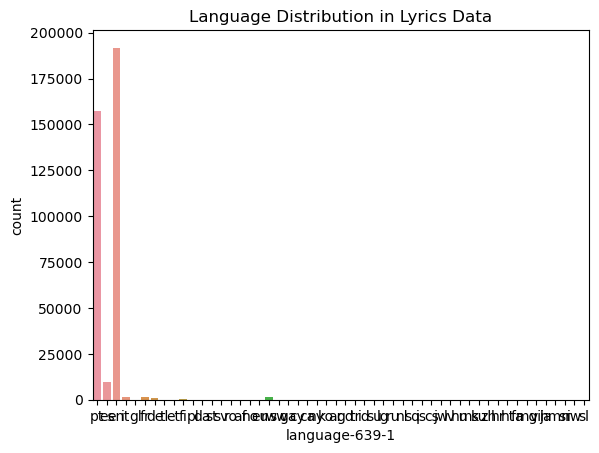

In [136]:
# Step 5: Data Visualization
## Popularity Distribution
sns.histplot(artist_data['Popularity'])
plt.title('Popularity Distribution')
plt.show()

## Language Distribution in Lyrics Data
sns.countplot(data=lyrics_data, x='language-639-1')
plt.title('Language Distribution in Lyrics Data')
plt.show()

In [ ]:
DEFAULT_SYSTEM_PROMPT = """
You are a creative, world-famous expert lyricist. Write lyrics for a song, given just a title, artist name, possible genres, and any additional information provided.
""".strip()


# def generate_training_prompt(
#     song_name: str, artist: str, genres: list, lyric: str, system_prompt: str = DEFAULT_SYSTEM_PROMPT
# ) -> str:
def generate_training_prompt(
    row, system_prompt: str = DEFAULT_SYSTEM_PROMPT
) -> str:
    song_name = row['SName']
    artist = row['Artist']
    genres = row['Genres']
    lyric = row['Lyric']
    
    
    genre_info = ""
    if genres != "" and genres is not None:
        genre_info = ', '.join(genres)
        genre_info = f" using the following genres: {genre_info}"
    return f"""### Instruction: {system_prompt}

### Input:
Write lyrics for a song titled "{song_name}" to be performed by {artist}{genre_info}.

### Response:
{lyric}
""".strip()

In [ ]:

    
    
    
def dataset_builder(data, system_prompt=DEFAULT_SYSTEM_PROMPT):  
    def generate_input(row):
        song_name = row['SName']
        artist = row['Artist']
        genres = row['Genres']
        genre_info = ""
        if genres != "" and genres is not None:
            genre_info = ', '.join(genres)
            genre_info = f" using the following genres: {genre_info}"
        
        return f"""Write lyrics for a song titled "{song_name}" to be performed by {artist}{genre_info}."""    
    
    def generate_text(row, system_prompt=DEFAULT_SYSTEM_PROMPT):
        inputs = row['input']
        lyrics = row['lyrics']
        return f"""### Instruction: {system_prompt}

### Input:
{inputs}

### Response:
{lyrics}
""".strip()   
    
    output_data = data.copy()
    output_data['input'] = output_data.apply(generate_input, axis=1)
    output_data['lyrics'] = output_data['Lyric']
    # output_data['text'] = output_data.apply(generate_training_prompt, axis=1)
    
    output_data['text'] = output_data.apply(generate_text, axis=1)
    
    output_data = output_data[['input', 'lyrics', 'text']]
    
    output_data = Dataset.from_pandas(output_data)
    
    return output_data